In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
sns.set_style("darkgrid")

In [12]:
df = pd.read_csv('./mpix_survey_03_15.csv') # upload the data sheet to the files tab in Colab
# drop header rows
df = df[2:]

# only completed survey results
df = df[df.Finished == 'True']
df = df.reset_index(drop=True)

print(len(df), 'completed responses')

df.head()

229 completed responses


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q14,Q15,Q15_3_TEXT,Q16,Q17
0,2021-03-08 13:52:16,2021-03-08 13:55:23,IP Address,108.234.59.140,100,186,True,2021-03-08 13:55:23,R_2B4mFudU9IuOH9n,NaN,...,Some Effort,No Effort,Some Effort,No Effort,A lot of Effort,NaN,Google Photos,NaN,Yes,No
1,2021-03-11 13:56:17,2021-03-11 14:04:18,IP Address,174.234.2.245,100,480,True,2021-03-11 14:04:18,R_3PADc4e5mmcLTF2,NaN,...,No Effort,Some Effort,Some Effort,Some Effort,Some Effort,Not a huge variety of picture placing on page,NaN,NaN,No,No
2,2021-03-11 13:58:45,2021-03-11 14:05:24,IP Address,174.195.132.49,100,399,True,2021-03-11 14:05:24,R_1DZPNAAz1PSbZ60,NaN,...,Some Effort,Some Effort,Some Effort,Some Effort,Some Effort,I liked being able to drag my photos into a te...,Google Photos,NaN,Yes,Yes
3,2021-03-11 13:55:57,2021-03-11 14:05:27,IP Address,75.39.198.102,100,569,True,2021-03-11 14:05:27,R_VWDRZofczYGvL7r,NaN,...,Some Effort,Some Effort,Some Effort,A lot of Effort,A lot of Effort,I recently put together an album with Shutterf...,"iCloud,Google Photos",NaN,Yes,No
4,2021-03-11 14:00:27,2021-03-11 14:06:04,IP Address,107.77.207.235,100,337,True,2021-03-11 14:06:05,R_2tbasLbp98LlmiR,NaN,...,Some Effort,Some Effort,No Effort,Some Effort,Some Effort,Unlimited free pages with Shutterfly! Made 3 b...,"iCloud,Google Photos",NaN,No,No


Extract the names and emails from DataFrame using column names, and saving to variable `names_emails`

In [13]:
names_emails = df[['Q22', 'Q23']].dropna(subset=['Q23'])
names_emails = names_emails.reset_index(drop=True) # 206, validated with search using regular expressions
#len(match) # 206 entries

# Extract the newest names since Monday
names_emails = names_emails[206:]

Export `names_emails` to csv file

*Find respondantNames.csv in the files tab of Google colab*

In [14]:
# from google.colab import files
# names_emails.to_csv('respondantNames.csv') 
# files.download('respondantNames.csv')

### **Question 5 (Numeric Approach)**: How would you rate the importance of the following physical features of a photobook?

Mean of Physical Features (0 = Not important, 2 = Very Important)

                        count      mean       std
Book Bindings           189.0  1.259259  0.677512
Custom Cover            189.0  1.253968  0.743087
Photo Page Layout       189.0  1.645503  0.570781
Paper Material          189.0  1.513228  0.588981
Photo Print Material    189.0  1.671958  0.572701
Holiday Special Themes  189.0  0.470899  0.672760




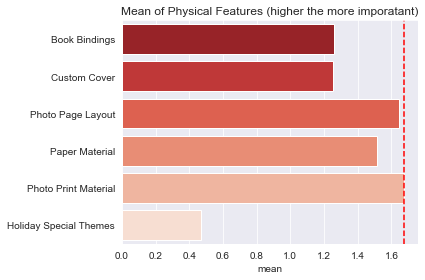

In [23]:
q5 = df[['Q5_1','Q5_2','Q5_3','Q5_4','Q5_5','Q5_6']]

q5 = q5.dropna().reset_index(drop=True)

q5.columns=['Book Bindings','Custom Cover','Photo Page Layout','Paper Material','Photo Print Material','Holiday Special Themes']

# 0 pt for not important, 1 pt for somwhat, 2 for very

def set_score (row):
  if row == "Not Important":
    return 0
  elif row == "Somewhat Important":
    return 1
  else:
    return 2

for col in q5:
  q5[col] = q5[col].apply(set_score)

q5_mean = q5.describe().iloc[:3]

print(f"Mean of Physical Features (0 = Not important, 2 = Very Important)\n")
print(q5_mean.T)
print('\n')

f, ax = plt.subplots(1)

ax.set_title("Mean of Physical Features (higher the more imporatant)")
ax.axvline(x = 1.671958, linestyle='--', color='r')
sns.barplot(x = q5_mean.T["mean"], y = q5_mean.T.index, orient='h', ax=ax, palette="Reds_r");
f.tight_layout();

*Q5 Interpretations:*

Looking at the means, we can infer that among those who have participated in our survey, people found the **Photo Print Material to be the most important physical feature** of a photobook (~1.675). By the same logic, the **least** significant physical feature appears to be **Holiday/Special Themes**.

Additionally, the standard deviation of responses for Photo Print Material also appears to be the lowest, suggesting that the answers are more unified and closely clustered around the mean.

### **Question 7 (Numeric Approach)**: Which of the following factors would most impact your choice of platform/vendor for photo books? (Rank from 1-5, 1 being the most important factor)

Mean of categories (lower the more imporatant):

Photo Print Quality                1.855814
Price                              2.344186
Page Template Ease of Use          2.944186
More Customizable Features         3.595349
Utilities for Organizing Photos    4.260465
Name: mean, dtype: float64


                                 count      mean       std
Price                            215.0  2.344186  1.223848
Photo Print Quality              215.0  1.855814  1.024308
More Customizable Features       215.0  3.595349  1.199290
Page Template Ease of Use        215.0  2.944186  1.150640
Utilities for Organizing Photos  215.0  4.260465  1.017175




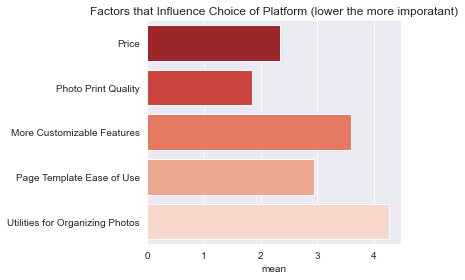

In [24]:
q7 = df[['Q7_1','Q7_2','Q7_3','Q7_4','Q7_5']]

q7 = q7.dropna().reset_index(drop=True)

q7.columns=['Price','Photo Print Quality','More Customizable Features','Page Template Ease of Use','Utilities for Organizing Photos']

from matplotlib import pyplot as plt

for col in q7:
  q7[col] = q7[col].apply(lambda x: int(x))

print("Mean of categories (lower the more imporatant):\n")
print(q7.describe().loc['mean'].sort_values(ascending=True))
print("\n")
q7_mean = q7.describe().iloc[:3]

print(q7_mean.T)
print('\n')

f, ax = plt.subplots(1)
ax.set_title("Factors that Influence Choice of Platform (lower the more imporatant)")

sns.barplot(x = q7_mean.T["mean"], y = q7_mean.T.index, orient='h', ax=ax, palette="Reds_r");
f.tight_layout();

*Q7 Interpretations*

By looking at the means of the ranks, **Photo Print Quality** appears to be the most impactful factor that influcenes a customer's choice of platform when it comes to photobook ordering.

### **Question 13 (Numeric Approach)**: Please rate the following steps in creating a photobook in terms of your expected effort

215 Total Valid Responses

Levels of Effort Anticipated (0 = no effort, 2 = a lot)

                        count      mean       std
Choosing Photos         215.0  1.395349  0.585635
Photo Upload            215.0  0.520930  0.578654
Writing Narrative       215.0  0.972093  0.595280
Cropping and Adjusting  215.0  0.804651  0.562851
Select Book Materials   215.0  0.697674  0.577413
Finding Templates       215.0  0.972093  0.579367
Customizing Templates   215.0  1.195349  0.554486




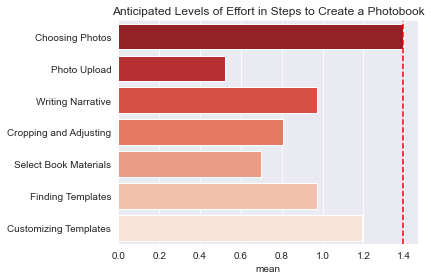

In [25]:
q13 = df[['Q13_1','Q13_2','Q13_3','Q13_4','Q13_5', 'Q13_6', 'Q13_7']]
q13.columns=['Choosing Photos','Photo Upload','Writing Narrative','Cropping and Adjusting','Select Book Materials','Finding Templates','Customizing Templates']
q13 = q13.dropna().reset_index(drop=True)
print(f"{len(q13)} Total Valid Responses\n") # 215/229 responses are complete
print(f"Levels of Effort Anticipated (0 = no effort, 2 = a lot)\n")

def set_score (row):
  if row == "A lot of Effort":
    return 2
  elif row == "Some Effort":
    return 1
  else:
    return 0

for col in q13:
  q13[col] = q13[col].apply(set_score)

q13_mean = q13.describe().iloc[:3]
print(q13_mean.T)
print('\n')

f, ax = plt.subplots(1)
ax.axvline(x = 1.395349, linestyle='--', color='r')
ax.set_title("Anticipated Levels of Effort in Steps to Create a Photobook")
sns.barplot(x = q13_mean.T["mean"], y = q13_mean.T.index, orient='h', ax=ax, palette="Reds_r");
f.tight_layout();


### **Question 4** (those who only used Mpix before) -> Quesiton 13 (Level of effort)

Levels of Effort Anticipated (0 = no effort, 2 = a lot)

                        count      mean       std
Choosing Photos          11.0  1.545455  0.522233
Photo Upload             11.0  0.454545  0.522233
Writing Narrative        11.0  0.727273  0.646670
Cropping and Adjusting   11.0  0.727273  0.467099
Select Book Materials    11.0  0.909091  0.831209
Finding Templates        11.0  0.818182  0.603023
Customizing Templates    11.0  1.272727  0.646670




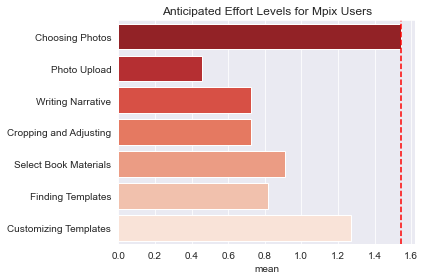

In [26]:
mpix_effort = df[['Q4', 'Q13_1','Q13_2','Q13_3','Q13_4','Q13_5', 'Q13_6', 'Q13_7']]
mpix_effort = mpix_effort[mpix_effort["Q4"] == 'Mpix'].dropna()
mpix_effort = mpix_effort.reset_index(drop=True)
mpix_effort.columns=['Vendor','Choosing Photos','Photo Upload','Writing Narrative','Cropping and Adjusting','Select Book Materials','Finding Templates','Customizing Templates']

def set_score (row):
  if row == "A lot of Effort":
    return 2
  elif row == "Some Effort":
    return 1
  else:
    return 0

for col in mpix_effort:
  mpix_effort[col] = mpix_effort[col].apply(set_score)

mpix_effort_mean = mpix_effort.describe().iloc[:3]
mpix_effort_mean = mpix_effort_mean.drop(['Vendor'], axis=1)
print(f"Levels of Effort Anticipated (0 = no effort, 2 = a lot)\n")
print(mpix_effort_mean.T)
print('\n')

f, ax = plt.subplots(1)
ax.axvline(x = 1.545455, linestyle='--', color='r')
ax.set_title("Anticipated Effort Levels for Mpix Users")
sns.barplot(x = mpix_effort_mean.T["mean"], y = mpix_effort_mean.T.index, orient='h', ax=ax, palette="Reds_r");
f.tight_layout();

*Interpretations*

Among the 11 users who only utilized Mpix to make a photobook before, according to the mean of the responses, the level of expected effort goes as follows (0 = no effort, 2 = a lot of effort):

Most Difficult => **Choosing Photos** (1.545455)

Easiest => **Photo Upload** (0.454545)